$$ Cloud-Architecture

># Importing Files

In [137]:

from vgg import FeatureExtractor
import numpy as np
from PIL import Image
import os
from pathlib import Path
import tkinter as tk 
from tkinter import filedialog 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans


># Reading Files 

In [138]:
images = []
database = r"C:\Users\piyus\OneDrive\Documents\Office\21Sep\CBIR\vgg-git\sis\database"
for filename in os.listdir(database):
    img = Image.open(os.path.join(database,filename))
    '''Initializing dictionary '''
    image_info = {
        "image_name": os.path.basename(os.path.join(database,filename)),
        "image_data": img,
        "image_path": os.path.join(database,filename)
    }
    '''checking for image readability'''
    if img is not None:
        images.append(image_info)

In [139]:
print(images[0]["image_data"])### ignore this

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1254x837 at 0x20146FD7D60>


>#  Extracting features and saving it to numpy file

In [28]:
# fe = FeatureExtractor()

# for img in images:
#     temp = fe.extract(img["image_data"])
#     feature_path = Path("C:/Users/piyus/OneDrive/Documents/Office/21Sep/CBIR/vgg-git/sis/features/") / (img["image_name"] + ".npy")
#     np.save(feature_path,temp)

># Taking image as input 

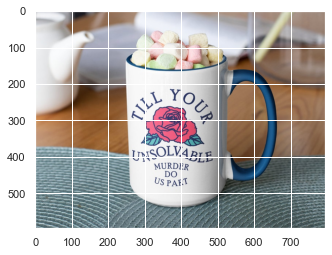

In [140]:
root = tk.Tk() 
root.withdraw() 
file_path = filedialog.askopenfilename() 
query = Image.open(file_path)
plt.imshow(img)

>## Finding L2 Distance from query image

>reading from saved npy features 

In [141]:
# dists = np.linalg.norm(features-query, axis=1)
features = []
img_paths = []
folder = "C:/Users/piyus/OneDrive/Documents/Office/21Sep/CBIR/vgg-git/sis/features/"
# for feature_path in Path("./features").glob("*.npy"):
#     features.append(np.load(feature_path))
#     img_paths.append(Path("./database") / (feature_path.stem + ".jpg"))
for filename in os.listdir(folder):
    features.append(np.load(Path(folder) / filename))

features = np.array(features)

>## Appending Distance in final list

In [142]:
query_fe = fe.extract(query)
dists = np.linalg.norm(features-query_fe, axis=1) 

In [143]:
i = 0
final = {"name" : [],
        "distance": []}
for a in dists:
    final["name"].append(images[i]["image_name"])
    final["distance"].append(a)
    i+=1
# for a in dists:
#     temp = {
#         "name" : images[i]["image_name"],
#         "distance" : a
#     }
#     final.append(temp)
#     i +=1

In [84]:
# print(final)

>## Scatter plot of distances

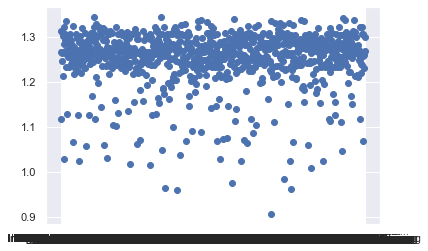

In [144]:
plt.scatter(final["name"],final["distance"])

plt.show()

Converting Data into pandas dataframe 

In [145]:
 df = pd.DataFrame(final)
 x = df.iloc[:,1:3]

>## Initializing K means

In [150]:
kmeans = KMeans(
    init="random",
    n_clusters=100,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [147]:
kmeans.fit(x)

KMeans(init='random', n_clusters=100, random_state=42)

In [148]:
print(x)

     distance
0    1.312546
1    1.267112
2    1.118044
3    1.245844
4    1.264796
..        ...
895  1.262933
896  1.260024
897  1.230954
898  1.269103
899  1.300057

[900 rows x 1 columns]


># Checking for cluster size

In [152]:
from scipy.cluster.vq import kmeans,vq

centroids,_ = kmeans(x,100)
# assign each sample to a cluster
idx,_ = vq(x,centroids)
#Print number of elements per cluster
print(np.bincount(idx))

[ 5  8  7  6 15 20 12  6  4  5  5  8  6 11 11 12  9 16 10  5  3  6  2  3
 25  2 10  6  6  4  9 19  4 11  4 11  8  7  2  7 16  7 17 14 12  9 17 14
 14  8  5 21  9 12  5 10  9  8 10 14  8  7  9  2  7  3  2  7 19 10  6  7
  5 15 15  9  5  2 10  8 15  9 13  6  8 18 11  5 11 11  5 10  6 14  7  3
  7 11  4  9]


In [153]:
k = 100
clusters = KMeans(k,random_state=42)
clusters.fit(x)

KMeans(n_clusters=100, random_state=42)

> #  Appending clusterid in new dataframe

In [156]:
y = pd.DataFrame(x,columns=["distance"])
y["clusterid"] = clusters.labels_

# `Printing new Dataframe`

In [157]:
y

,distance,clusterid
0,1.312546,27
1,1.267112,64
2,1.118044,59
3,1.245844,11
4,1.264796,21
...,...,...
895,1.262933,72
896,1.260024,54
897,1.230954,62
898,1.269103,35


| -------------------------------------------------------------------- | -------------------------------------------------------------------- |

# ``` Predicting new image's cluster id ```

In [135]:
clusters.predict(1.2)

ValueError: Expected 2D array, got scalar array instead:
array=1.2.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.